In [76]:
import requests as rq
from datetime import datetime
import os
import requests as rq
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [727]:
def getWordOccurence(terms):
    
    directory = "world_cup_reddit_data/posts/by_year"

    dd = defaultdict(list)
    
    for f in sorted(os.listdir(directory)):
        if f!=".DS_Store":
            f = os.path.join(directory, f)
            df = pd.read_csv(f) 
            
            year = f.replace(".csv", "").split("/")[3]

            score = 0
            for term in terms:
                for i in range(len(df["title"])):
                    if term in df["title"][i]:
                        score += 1

                num_posts = len(df)
                
                dd[term].append((score/num_posts)*100)

    return dd

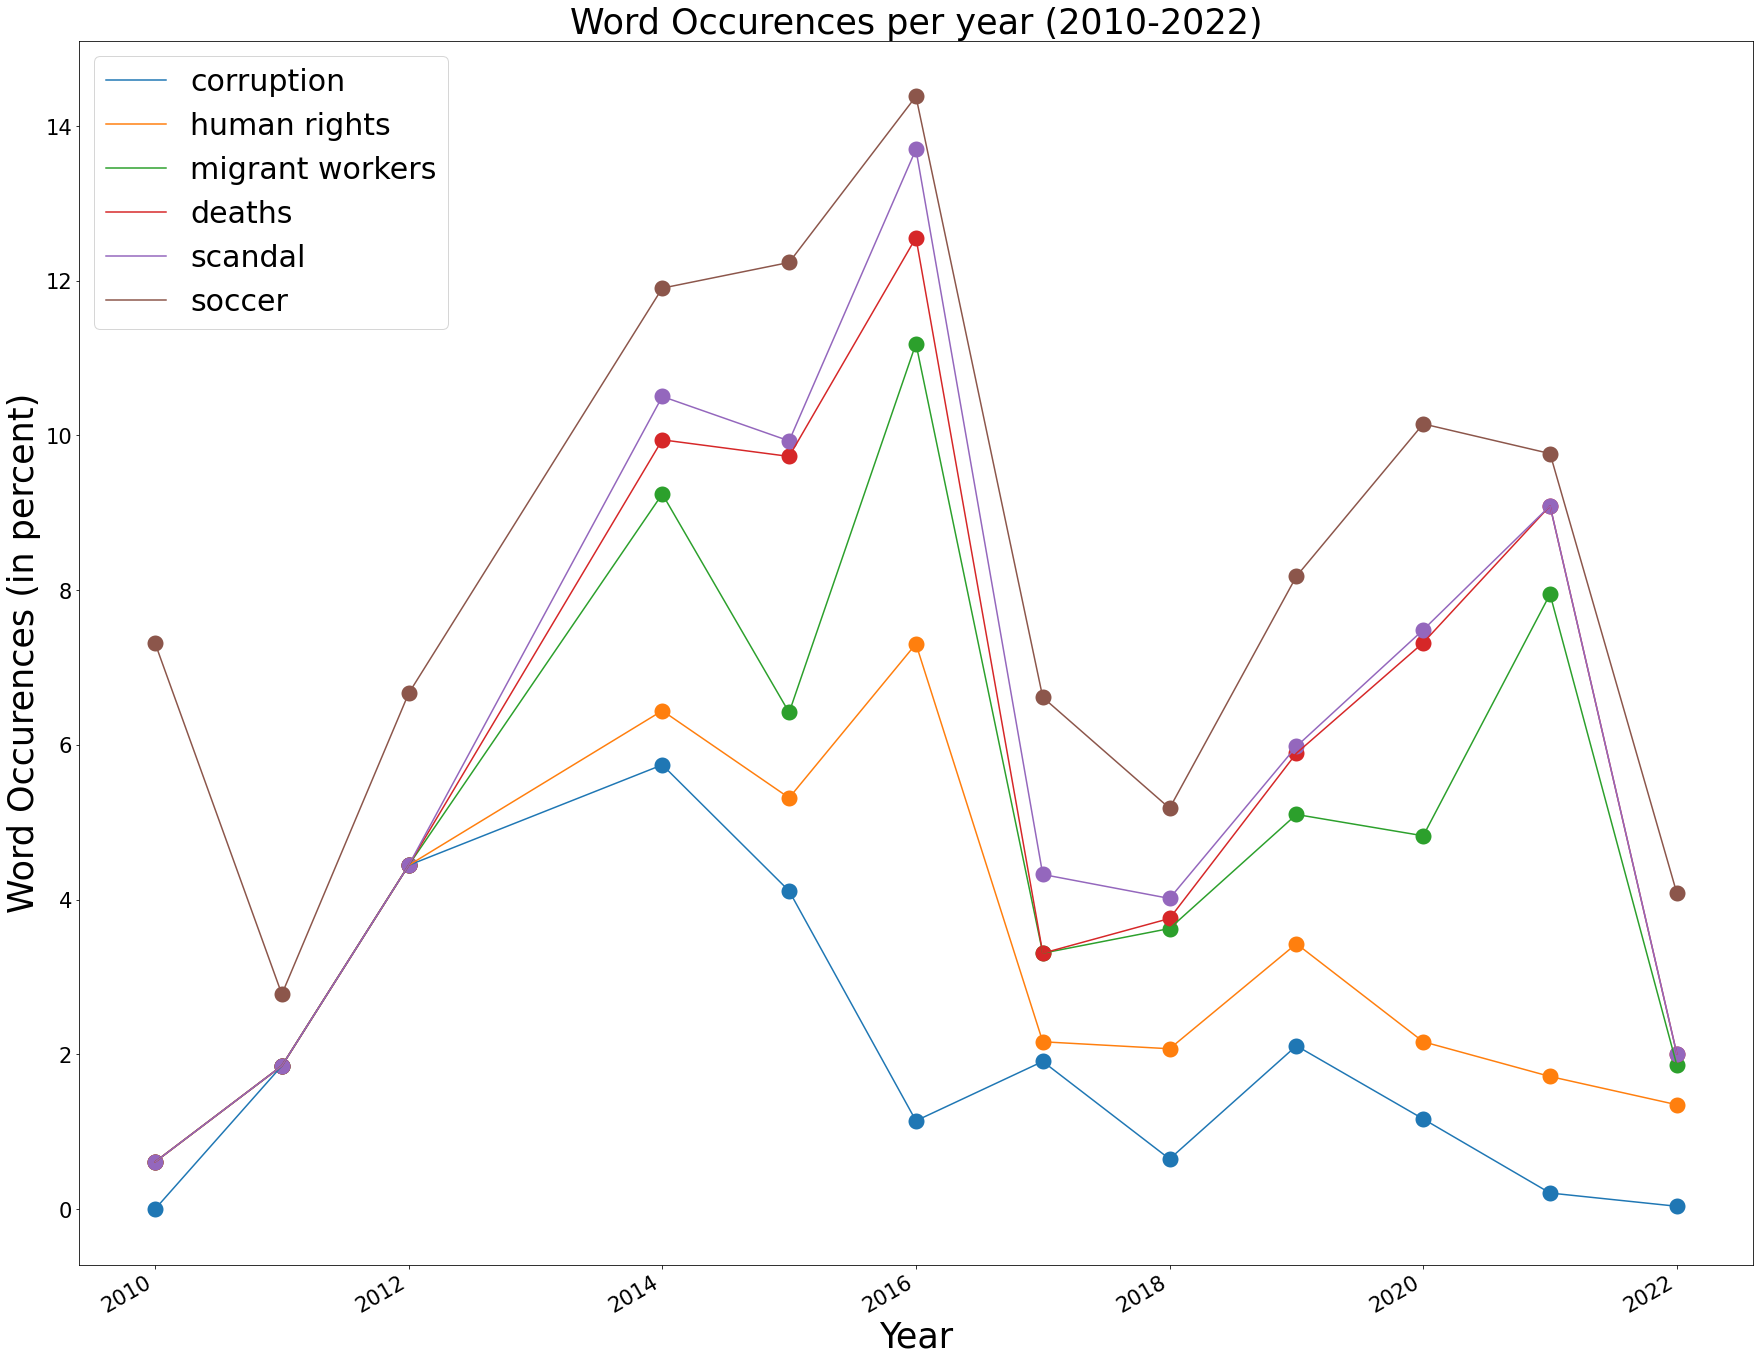

In [18]:
years = [2010,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022]
y = np.array(years)

terms = ["corruption", "human rights", "migrant workers", "deaths", "scandal", "soccer"]
dd = getWordOccurence(terms)

for key,value in dd.items():
    plt.scatter(y, value, linewidth=10)
    plt.plot(y, value, label=key) 
    plt.legend(loc="upper left", prop={'size': 30})
   
    plt.xlabel("Year", fontsize=35, fontweight="medium")
    plt.ylabel("Word Occurences (in percent)", fontsize=35, fontweight="medium")
    plt.title("Word Occurences per year (2010-2022)", fontsize=35, fontweight="medium")
    
plt.rcParams.update({'font.size': 21})

    
plt.gcf().set_size_inches(30,25)

    #plt.fill_between(x, y-err, y+err)


    #plt.errorbar(list_year_name, list_avg_weighted_comp_sent, yerr = list_sd_weighted_comp_sent)

    # beautify the x-labels
plt.gcf().autofmt_xdate()


plt.show()


In [19]:
directory = "world_cup_reddit_data/posts/by_year"

list_avg_weighted_comp_sent = []
list_sd_weighted_comp_sent = []
list_num_posts = []
list_year_name = []


for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
    
        
        avg_weighted_comp_sent = (df["sentiment_score_compound"] * df["score"]).mean()

        sd_weighted_comp_sent = (df["sentiment_score_compound"] * df["score"]).std()
        
        num_posts = len(df)
        
        list_avg_weighted_comp_sent.append(avg_weighted_comp_sent)
        list_sd_weighted_comp_sent.append(sd_weighted_comp_sent)
       
        list_num_posts.append(num_posts)
        list_year_name.append(f.replace(".csv", "").split("/")[3])


In [2032]:
directory = "world_cup_reddit_data/posts/by_year"

array = []
master_array = []
master_array1 = []

for f in sorted(os.listdir(directory)):
    if f!=".DS_Store":
        f = os.path.join(directory, f)
        df = pd.read_csv(f) 
        
        for i,row in df.iterrows():
            add_title = True
            score = row["num_comments"] +  row["score"]
            post = row["title"]
            if score < 2:
                master_array.append(post)
                
            elif score > 25:
                array.append(1)
                master_array1.append(post)

In [2033]:
import random

zero_posts = random.sample(master_array, 1250)

print(len((master_array1)))

master_array1.extend(zero_posts)

array.extend([0]*len(zero_posts))

1168


In [2034]:
final_array = np.array(array)

final_posts = np.array(master_array1)

In [2035]:
final_array.shape

(2418,)

In [2036]:
print(final_posts.shape)

(2418,)


In [2037]:
print(final_array.shape)

(2418,)


In [2038]:
import nltk
nltk.download('stopwords')

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #Snowball stemmer initialised

def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

i = 0
str1 = ' '
cleaned_posts = []
s = ''
for sent in final_posts:
    sent = cleanhtml(sent)
    filtered_sentence = []
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if cleaned_words.isalpha() and len(cleaned_words) >2:
                if cleaned_words.lower() not in stop:
                    s = (sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    
                else:
                    continue
            else:
                continue
    str1 = b' '.join(filtered_sentence)
    cleaned_posts.append(str1)
#print(cleaned_posts)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/beneibl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2039]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer=lambda d: d.split(' ')).fit(cleaned_posts)

In [2040]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(cleaned_posts)

data_train, data_test, labels_train, labels_test = train_test_split(X, final_array, test_size=0.20, random_state=42, stratify=final_array)



In [2055]:
clf = RandomForestClassifier(random_state = 0, max_depth= 100)
clf.fit(data_train, labels_train)

RandomForestClassifier(max_depth=100, random_state=0)

In [2056]:
clf.score(data_test,labels_test)

0.6900826446280992

In [2057]:
clf.score(data_train,labels_train)

0.967425025853154

In [2044]:
pred_list = clf.predict(data_test)

In [2045]:
pred_list

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [2046]:
count = 0
count_cor0 = 0
count_cor1 = 0

for i in labels_test:
    if i == pred_list[count]:
        if i == 1:
            count_cor1 += 1
        elif i == 0:
            count_cor0 += 1
    count += 1

In [2047]:
count_cor0

182

In [2048]:
count_cor1/sum(labels_test==1)

0.6495726495726496

In [2049]:
sum(pred_list==0)

print(sum(labels_train==0))

print(sum(labels_train==1))

print(sum(labels_train==2))

1000
934
0


In [2050]:
sum(labels_test==0)/len(labels_test)

0.5165289256198347

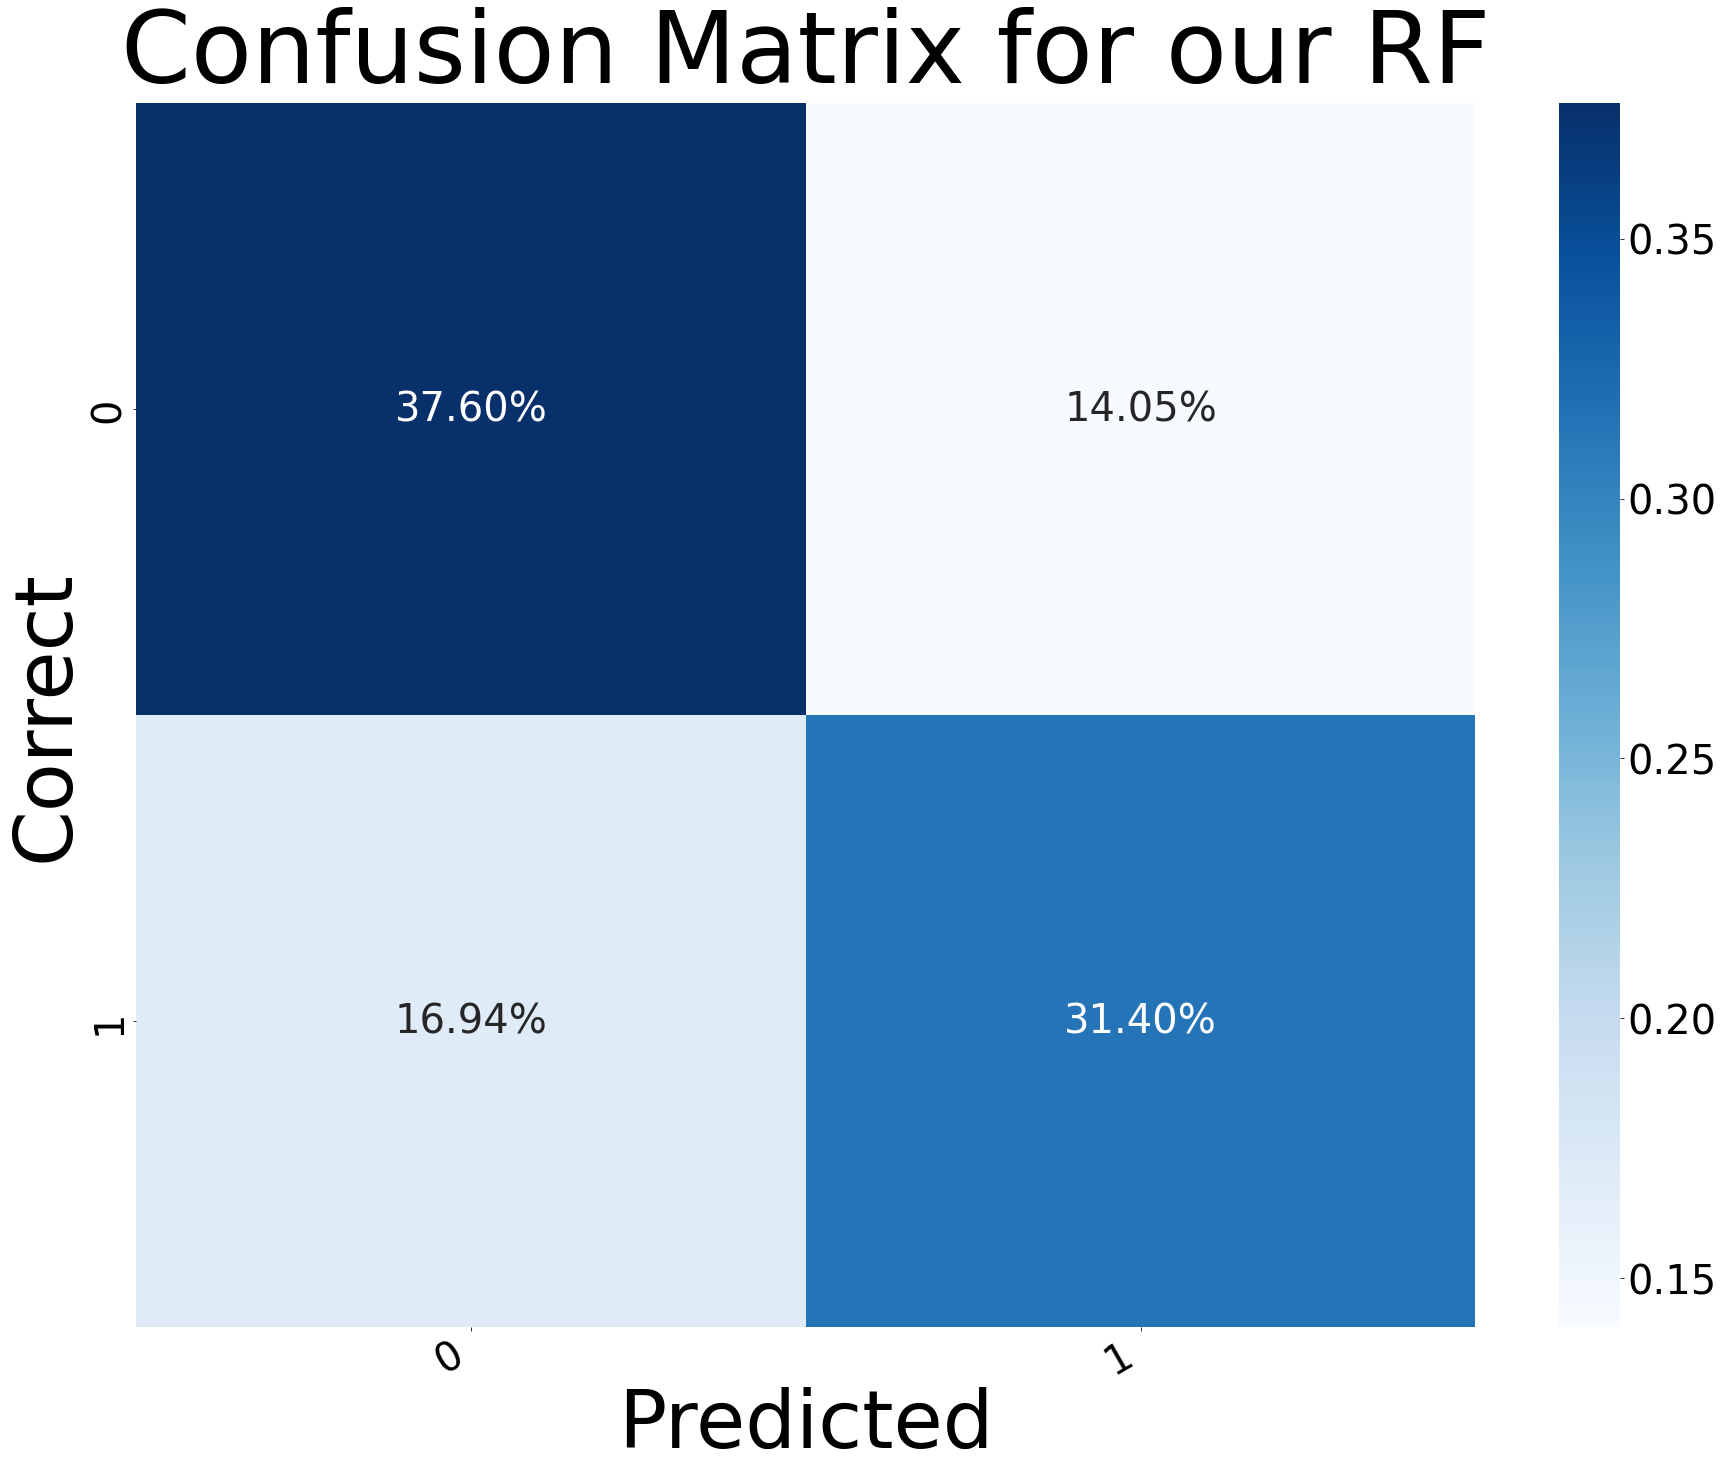

In [2052]:
conf_mat = confusion_matrix(labels_test, pred_list)
#print(conf_mat)

import seaborn
seaborn.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt= ".2%", cmap="Blues")
plt.xlabel("Predicted", fontsize=80, fontweight="medium")
plt.ylabel("Correct", fontsize=80, fontweight="medium")
plt.title("Confusion Matrix for our RF", fontsize=100, fontweight="medium")
plt.gcf().set_size_inches(30,25)
plt.gcf().autofmt_xdate()
plt.rcParams.update({'font.size': 60})
plt.show()

In [2058]:
def feature_importance_graph(clf):
    """
    """
    
    ft_imp = sorted(list(clf.feature_importances_), reverse = True)
    
    lot = []
    counter = 0

    for i in list(clf.feature_importances_):
        tuple1 = (i, counter)
        counter += 1
        lot.append(tuple1)
    
    list_import = sorted(lot, reverse = True)
    
    list1 = list(tfidf.get_feature_names_out())
    
    top10 = []

    for i in range(10):
        top10.append(list_import[i][1])
    
    top10_words = []

    for number in top10:
        top10_words.append(list1[number])
        
        
    plt.figure()
    plt.title("Feature importances")
    plt.barh(top10_words, ft_imp[:10], color=["tab:blue","tab:orange","tab:green","tab:red","tab:purple",
                                              "tab:brown", "tab:pink","tab:gray","tab:olive","tab:cyan"], align="center")
    plt.xlabel("Importance", fontsize=50, fontweight="medium")
    plt.ylabel("Terms (Stems)", fontsize=50, fontweight="medium")
    plt.title("Feature Importance in our RF Model (Qatar)", fontsize=65, fontweight="medium")
    plt.gcf().set_size_inches(30,25)
    plt.gcf().autofmt_xdate()
    plt.rcParams.update({'font.size': 40})
    plt.show()

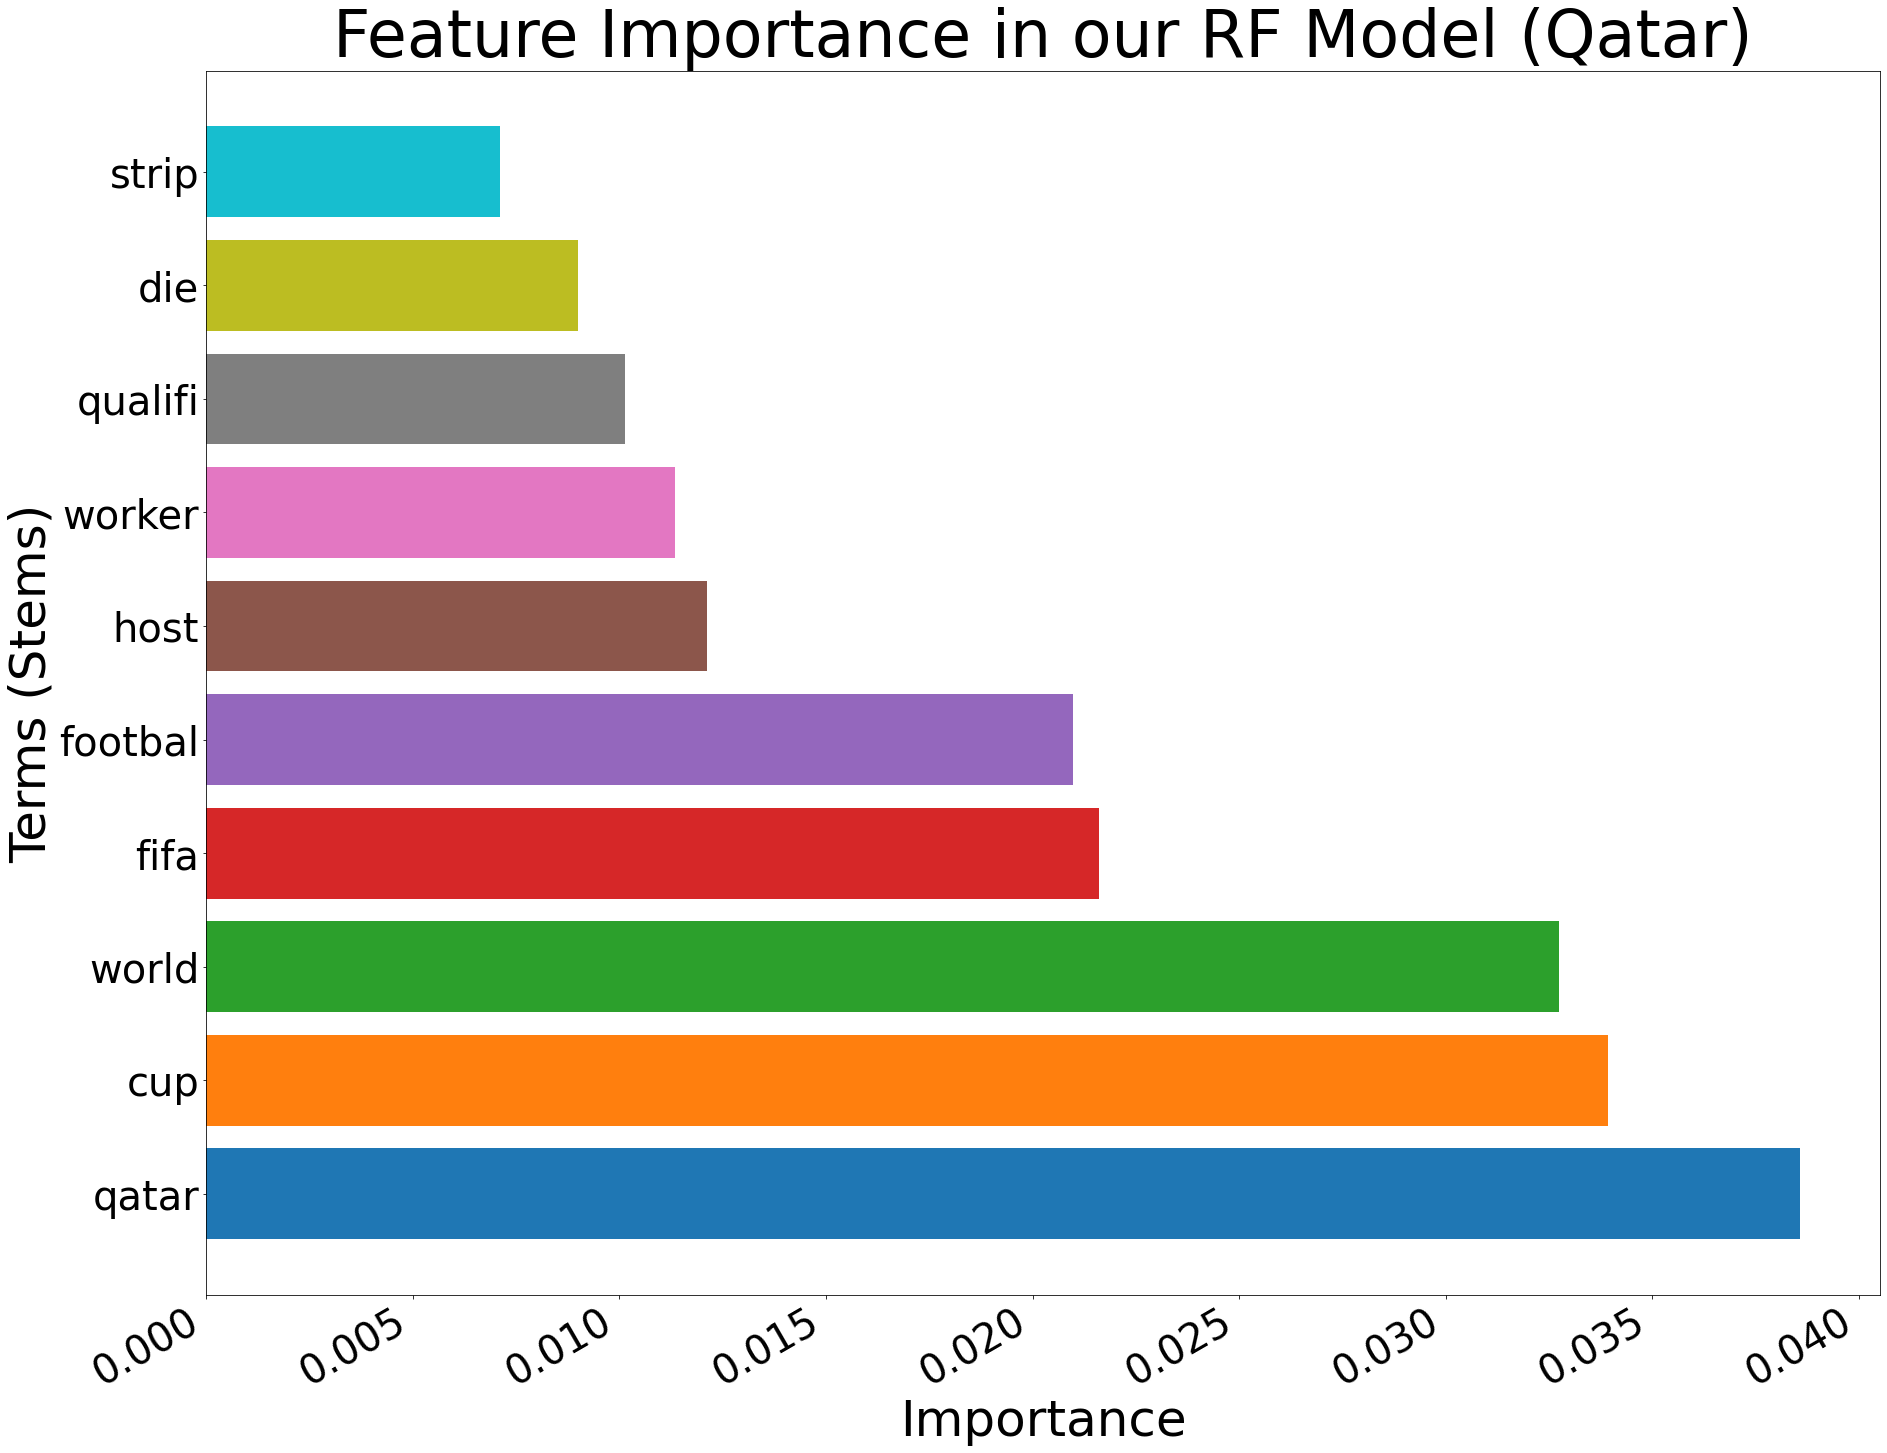

In [2059]:
feature_importance_graph(clf)